In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'0 1': 1024}


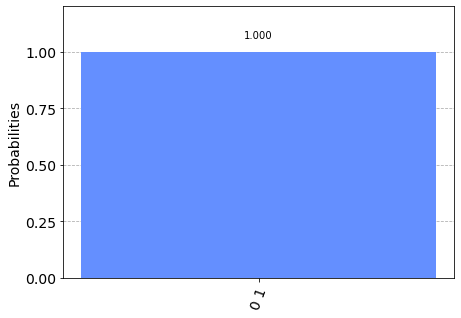

In [4]:
q = QuantumRegister(2)
b0 = ClassicalRegister(1, "b0")
b1 = ClassicalRegister(1, "b1")
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
qc = QuantumCircuit(q, c0, c1, name="superdense_coding")

# emaranhamento
qc.h(q[0])
qc.cx(q[0],q[1])

# Alice
b0=0
b1=1

if(b0 == 1):
    qc.x(q[0])
if(b1 == 1):
    qc.z(q[0])

# Bob recebe o qubit de Alice
qc.cx(q[0],q[1])    
qc.h(q[0])

qc.measure(q[0], c0[0])
qc.measure(q[1], c1[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)# execute the quantum circuit
print(counts)
# Run in interactive mode
#iplot_histogram(counts)

plot_histogram(counts)

#psi  = result.get_statevector(qc)
#plot_state_hinton(psi)

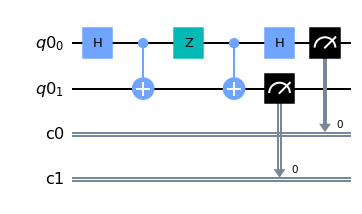

In [5]:
qc.draw(output='mpl')

In [6]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_belem')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub

In [8]:
result_exp = job_exp.result()
print(result_exp)

account._job_result_object_storage:WARNING:2021-04-10 15:33:15,319: An error occurred while sending download completion acknowledgement: "HTTPSConnectionPool(host='api.quantum-computing.ibm.com', port=443): Read timed out. (read timeout=None)"


Result(backend_name='ibmq_belem', backend_version='1.0.6', qobj_id='c8aa6e3d-c3a0-4615-a798-d390d891261c', job_id='6071e67cb8a8755843ee8984', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 54, '0x1': 935, '0x2': 16, '0x3': 19}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c1', 0]], creg_sizes=[['c0', 1], ['c1', 1]], global_phase=3.141592653589793, memory_slots=2, metadata={}, n_qubits=5, name='superdense_coding', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), memory=False)], date=2021-04-10 15:06:48-03:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_belem', backend_version='1.0.6'), time_taken=4.079734563827515, execution_id='825fc806-9a27-11eb-bb59-b02628f7f59e', client_version={'qiskit': '0.25.0'})


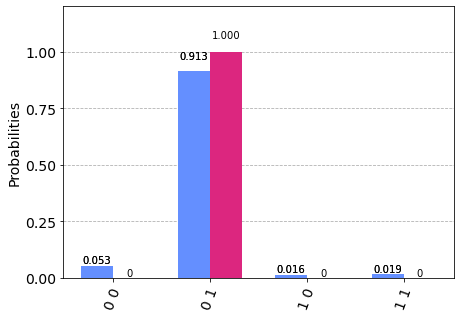

In [9]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])